<a href="https://colab.research.google.com/github/Alenushka2013/Projects/blob/main/Task_Skelar_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загальні відомості про досліджувані дані

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
url = 'https://docs.google.com/spreadsheets/d/1CYjnDZ6brLlvJCsU9YCYSKS2kiMKgoIICNyCPG6lm34/export?format=csv'
df = pd.read_csv(url, parse_dates=['request_time', 'start_time', 'finish_time'])

# Перегляд перших кількох рядків
print(df.head())

   moderator  id_request        request_time          start_time  \
0        165      159660 2020-09-24 07:01:16 2020-10-01 16:00:31   
1        178      160116 2020-09-24 22:32:15 2020-10-01 13:21:42   
2        187      160178 2020-09-25 02:58:13 2020-10-02 11:37:16   
3        178      160306 2020-09-25 09:44:12 2020-10-02 07:23:09   
4        178      163042 2020-09-30 15:56:08 2020-10-02 07:37:33   

          finish_time       team  
0 2020-10-01 16:02:02     retail  
1 2020-10-01 13:21:43     retail  
2 2020-10-02 11:41:56  wholesale  
3 2020-10-02 07:25:33     retail  
4 2020-10-02 07:47:57     retail  


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35617 entries, 0 to 35616
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   moderator     35617 non-null  int64         
 1   id_request    35617 non-null  int64         
 2   request_time  35617 non-null  datetime64[ns]
 3   start_time    35617 non-null  datetime64[ns]
 4   finish_time   35617 non-null  datetime64[ns]
 5   team          35617 non-null  object        
dtypes: datetime64[ns](3), int64(2), object(1)
memory usage: 1.6+ MB


In [34]:
df.request_time.min(), df.finish_time.max()

(Timestamp('2020-09-24 07:01:16'), Timestamp('2020-12-31 22:52:16'))

In [35]:
df.finish_time.max() - df.request_time.min()

Timedelta('98 days 15:51:00')

In [36]:
df.groupby('team')['moderator'].nunique()

,moderator
team,
retail,24
wholesale,25


In [37]:
df.groupby('team')['id_request'].count()

,id_request
team,
retail,14025
wholesale,21592


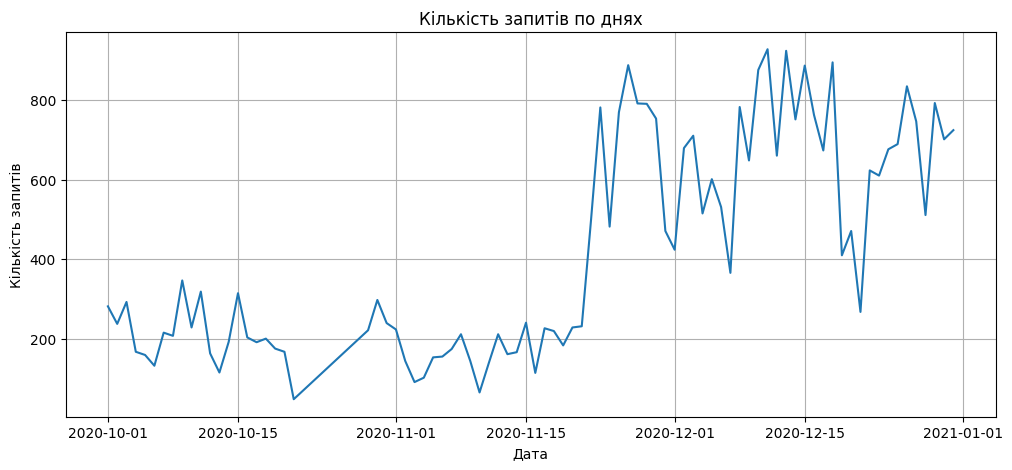

In [214]:
daily_requests = df.groupby('date').id_request.count()
plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_requests.index, y=daily_requests.values)
plt.title("Кількість запитів по днях")
plt.xlabel("Дата")
plt.ylabel("Кількість запитів")
plt.grid(True)
plt.show()

In [216]:
daily_requests.max()

927

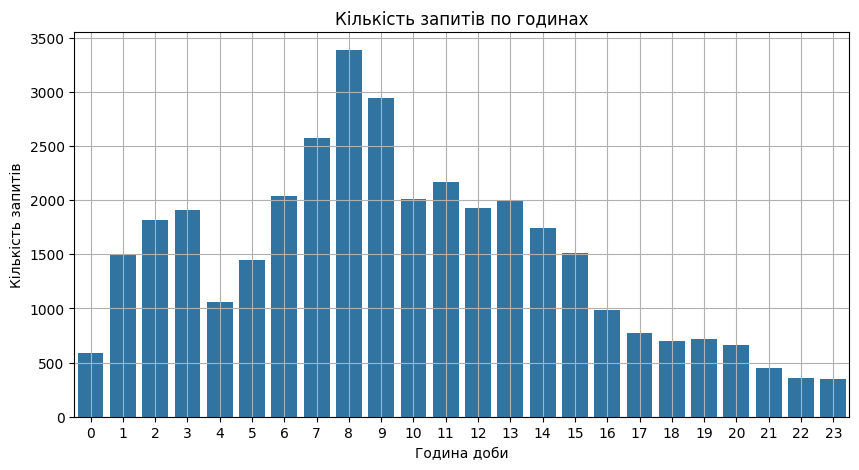

In [39]:
df["hour"] = df["request_time"].dt.hour
hourly = df.groupby("hour")["id_request"].count()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly.index, y=hourly.values)
plt.title("Кількість запитів по годинах")
plt.xlabel("Година доби")
plt.ylabel("Кількість запитів")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Наскільки служба підтримки відповідає очікуванням менеджменту? Як вона працює зараз?

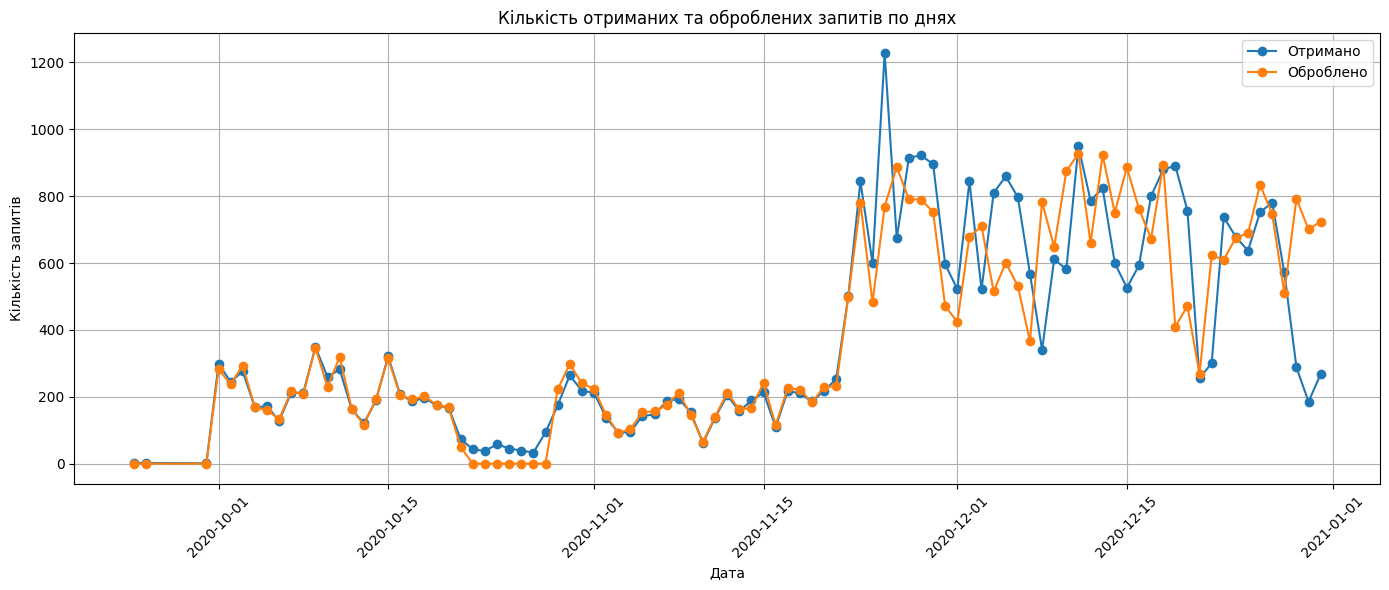

In [40]:
# Створюємо колонки з датою (без часу)
df["request_date"] = df["request_time"].dt.date
df["finish_date"] = df["finish_time"].dt.date

# Групуємо кількість запитів по днях
daily_requests = df.groupby("request_date").size().rename("received")
daily_finished = df.groupby("finish_date").size().rename("processed")

# Об'єднуємо в один датафрейм
daily_counts = pd.concat([daily_requests, daily_finished], axis=1).fillna(0)

# Створюємо графік
plt.figure(figsize=(14, 6))
plt.plot(daily_counts.index, daily_counts["received"], label="Отримано", marker='o')
plt.plot(daily_counts.index, daily_counts["processed"], label="Оброблено", marker='o')
plt.xlabel("Дата")
plt.ylabel("Кількість запитів")
plt.title("Кількість отриманих та оброблених запитів по днях")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


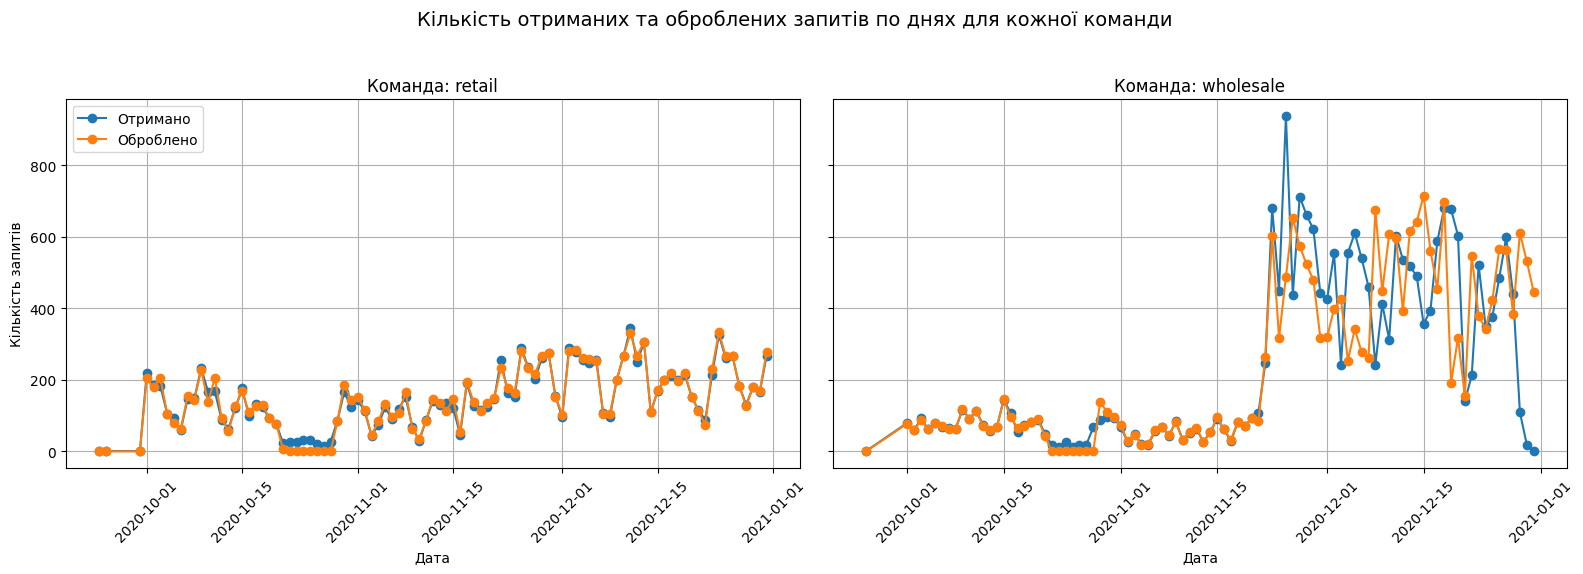

In [41]:
# Підготовка графіків для кожної команди
teams = df["team"].unique()
fig, axes = plt.subplots(1, len(teams), figsize=(16, 6), sharey=True)

for i, team in enumerate(teams):
    team_df = df[df["team"] == team]

    # Підрахунок отриманих та оброблених запитів
    daily_requests = team_df.groupby("request_date").size().rename("received")
    daily_finished = team_df.groupby("finish_date").size().rename("processed")

    # Об'єднання у спільну таблицю
    daily_counts = pd.concat([daily_requests, daily_finished], axis=1).fillna(0)

    # Побудова графіка
    axes[i].plot(daily_counts.index, daily_counts["received"], label="Отримано", marker='o')
    axes[i].plot(daily_counts.index, daily_counts["processed"], label="Оброблено", marker='o')
    axes[i].set_title(f"Команда: {team}")
    axes[i].set_xlabel("Дата")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

axes[0].set_ylabel("Кількість запитів")
axes[0].legend(loc='upper left')
plt.suptitle("Кількість отриманих та оброблених запитів по днях для кожної команди", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35617 entries, 0 to 35616
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   moderator     35617 non-null  int64         
 1   id_request    35617 non-null  int64         
 2   request_time  35617 non-null  datetime64[ns]
 3   start_time    35617 non-null  datetime64[ns]
 4   finish_time   35617 non-null  datetime64[ns]
 5   team          35617 non-null  object        
 6   hour          35617 non-null  int32         
 7   request_date  35617 non-null  object        
 8   finish_date   35617 non-null  object        
dtypes: datetime64[ns](3), int32(1), int64(2), object(3)
memory usage: 2.3+ MB


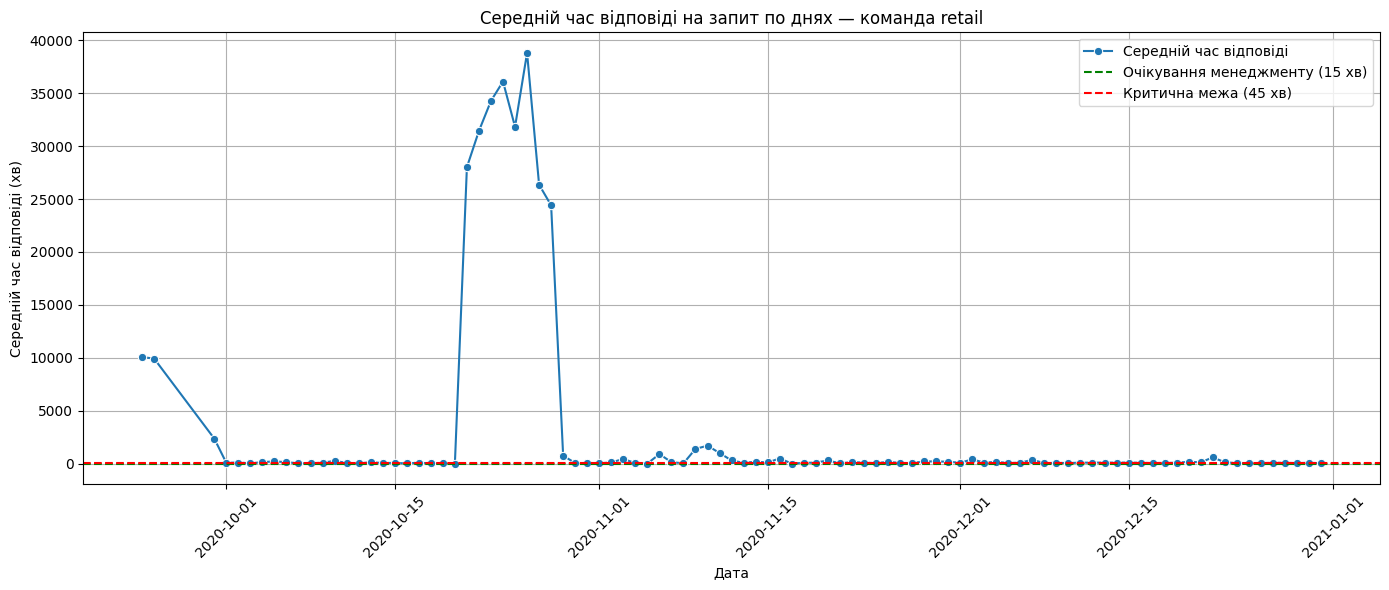

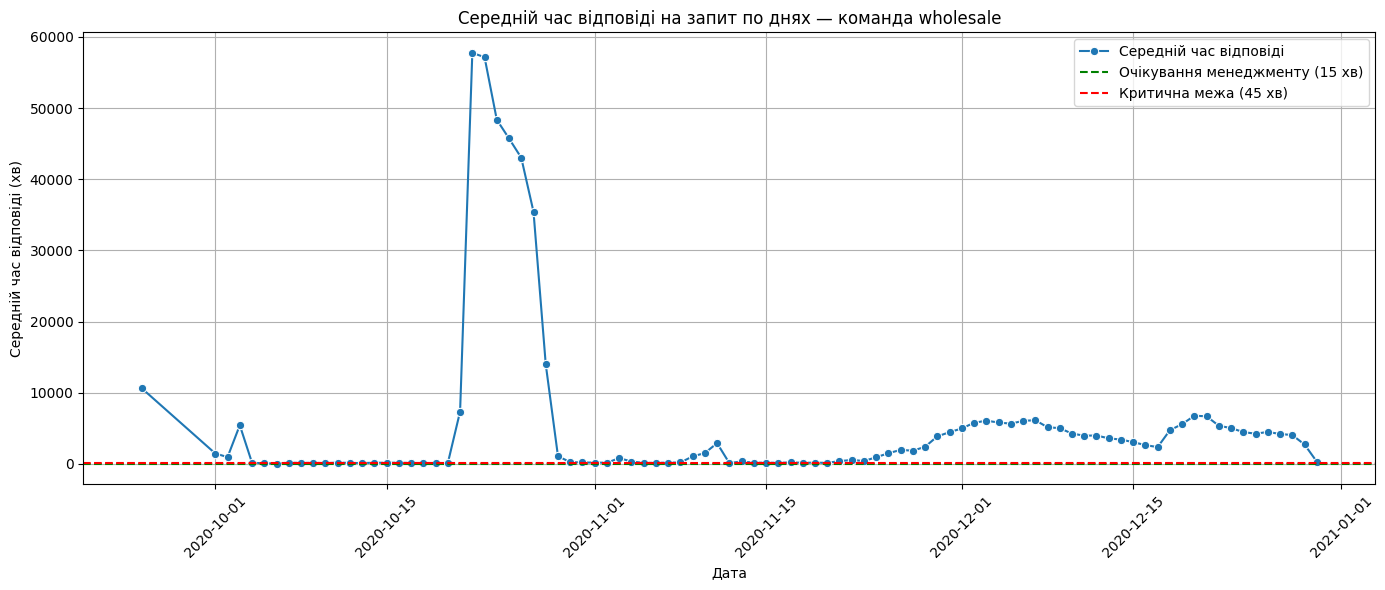

In [43]:
# Обчислення часу очікування у хвилинах
df["wait_time"] = (df["start_time"] - df["request_time"]).dt.total_seconds() / 60

# Виділяємо дату (без часу)
df["date"] = df["request_time"].dt.date

# Групуємо по даті та команді, рахуємо середній час очікування
daily_wait = df.groupby(["team", "date"])["wait_time"].mean().reset_index()

# Малюємо графіки для кожної команди
teams = daily_wait["team"].unique()

for team in teams:
    team_data = daily_wait[daily_wait["team"] == team]

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=team_data, x="date", y="wait_time", marker='o', label="Середній час відповіді")

    # Додаємо горизонтальні лінії на 15 та 45 хвилин
    plt.axhline(y=15, color='green', linestyle='--', label="Очікування менеджменту (15 хв)")
    plt.axhline(y=45, color='red', linestyle='--', label="Критична межа (45 хв)")

    plt.title(f"Середній час відповіді на запит по днях — команда {team}")
    plt.xlabel("Дата")
    plt.ylabel("Середній час відповіді (хв)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Такі графіки не інформативні, подивимося, що відбувається з 2020-11-01

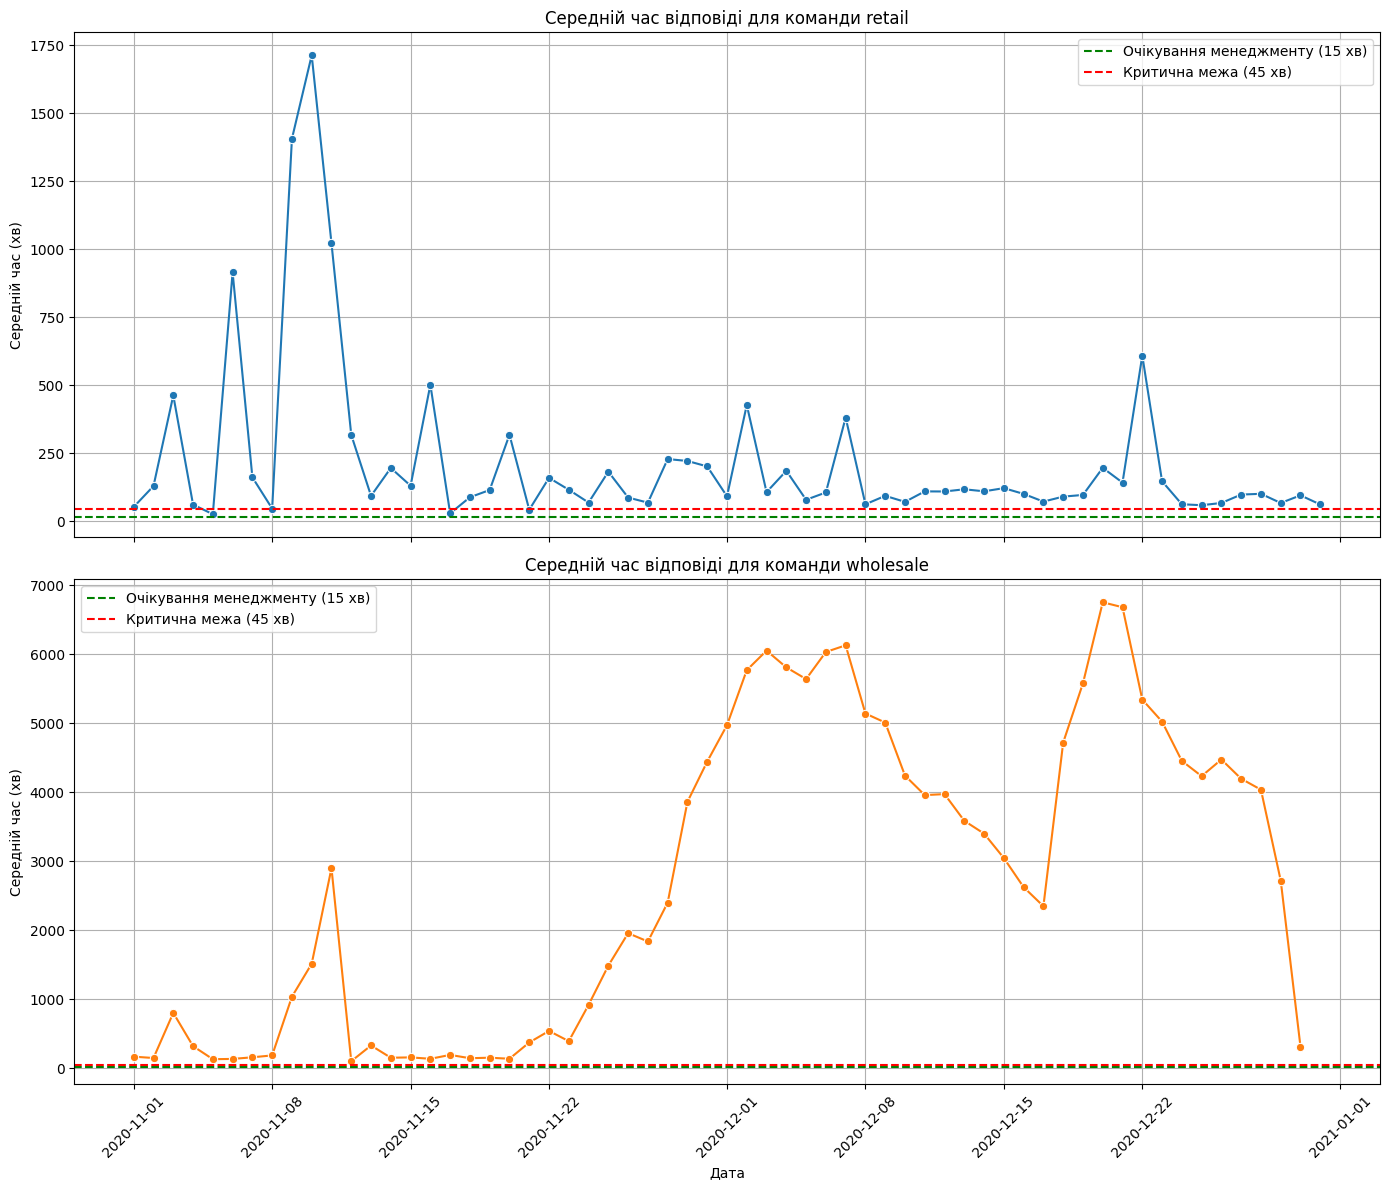

In [44]:
# Фільтрація з 2020-11-01
df_filtered = df[df["request_time"] >= "2020-11-01"]

# Групування по даті та команді
daily_wait = df_filtered.groupby(["team", "date"])["wait_time"].mean().reset_index()

# Створення окремих фреймів для кожної команди
teams = daily_wait["team"].unique()
palette = ["#1f77b4", "#ff7f0e"]  # синій і помаранчевий

fig, axes = plt.subplots(nrows=len(teams), ncols=1, figsize=(14, 6 * len(teams)), sharex=True)

if len(teams) == 1:
    axes = [axes]

for ax, team, color in zip(axes, teams, palette):
    team_data = daily_wait[daily_wait["team"] == team]
    sns.lineplot(data=team_data, x="date", y="wait_time", marker='o', ax=ax, color=color)

    # Лінії очікування
    ax.axhline(15, linestyle='--', color='green', label="Очікування менеджменту (15 хв)")
    ax.axhline(45, linestyle='--', color='red', label="Критична межа (45 хв)")

    ax.set_title(f"Середній час відповіді для команди {team}")
    ax.set_ylabel("Середній час (хв)")
    ax.legend()
    ax.grid(True)

axes[-1].set_xlabel("Дата")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Теж важко оцінити, оскільки дуже великий час очікування. І тут виникає питання, а як саме працює така служба підтримки? Чи працює вона цілодобово? Якщо за певним графіком, то чи можна не враховувати час, коли модератори не працюють в час очікування?

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35617 entries, 0 to 35616
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   moderator     35617 non-null  int64         
 1   id_request    35617 non-null  int64         
 2   request_time  35617 non-null  datetime64[ns]
 3   start_time    35617 non-null  datetime64[ns]
 4   finish_time   35617 non-null  datetime64[ns]
 5   team          35617 non-null  object        
 6   hour          35617 non-null  int32         
 7   request_date  35617 non-null  object        
 8   finish_date   35617 non-null  object        
 9   wait_time     35617 non-null  float64       
 10  date          35617 non-null  object        
dtypes: datetime64[ns](3), float64(1), int32(1), int64(2), object(4)
memory usage: 2.9+ MB


In [47]:
# Час обробки
df["processing_time"] = (df["finish_time"] - df["start_time"]).dt.total_seconds() / 60

# Загальний час очікування клієнта
df["total_time"] = (df["finish_time"] - df["request_time"]).dt.total_seconds() / 60

In [50]:
print("Середній час очікування клієнта:", df["wait_time"].mean().round(2), "хв")
print("Середній загальний час:", df["total_time"].mean().round(2), "хв")

# Частка запитів, що перевищують очікування менеджменту
over_15 = (df["wait_time"] > 15).mean()
over_45 = (df["wait_time"] > 45).mean()

print(f"Частка запитів з очікуванням >15 хв: {over_15:.2%}")
print(f"Частка запитів з очікуванням >45 хв: {over_45:.2%}")

Середній час очікування клієнта: 2468.73 хв
Середній загальний час: 2470.97 хв
Частка запитів з очікуванням >15 хв: 91.94%
Частка запитів з очікуванням >45 хв: 78.34%


<ipython-input-52-0ba69870fe49>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_quality = df.groupby(["team", "week"]).apply(service_quality).reset_index()


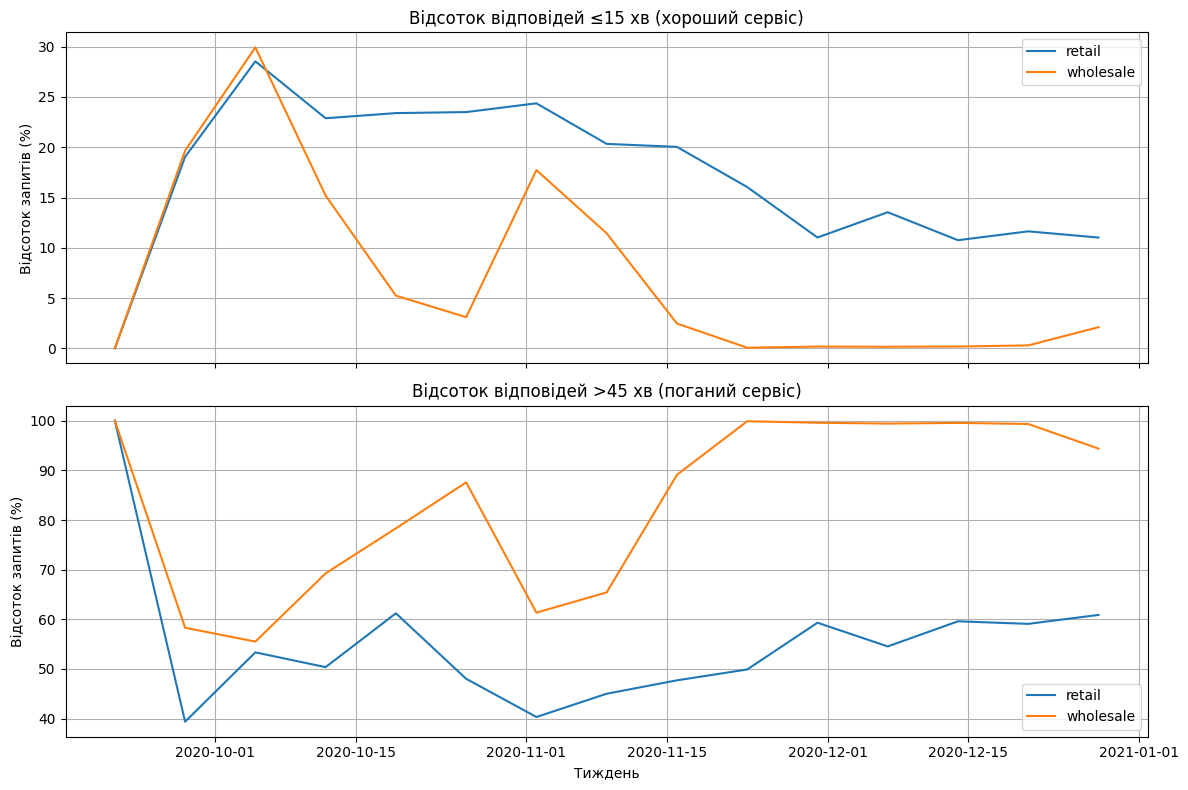

In [52]:
# Створюємо колонку тижня
df["week"] = df["request_time"].dt.to_period("W").apply(lambda r: r.start_time)

# Групуємо по тижнях і командах
def service_quality(group):
    total = len(group)
    good = (group["wait_time"] <= 15).sum()
    bad = (group["wait_time"] > 45).sum()
    return pd.Series({
        "good_pct": good / total * 100,
        "bad_pct": bad / total * 100
    })

weekly_quality = df.groupby(["team", "week"]).apply(service_quality).reset_index()

# Побудова графіків
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

for team in weekly_quality["team"].unique():
    team_data = weekly_quality[weekly_quality["team"] == team]
    axes[0].plot(team_data["week"], team_data["good_pct"], label=f"{team}")
    axes[1].plot(team_data["week"], team_data["bad_pct"], label=f"{team}")

axes[0].set_title("Відсоток відповідей ≤15 хв (хороший сервіс)")
axes[1].set_title("Відсоток відповідей >45 хв (поганий сервіс)")

for ax in axes:
    ax.set_ylabel("Відсоток запитів (%)")
    ax.legend()
    ax.grid(True)

plt.xlabel("Тиждень")
plt.tight_layout()
plt.show()

# Як варто змінити графік служби підтримки?

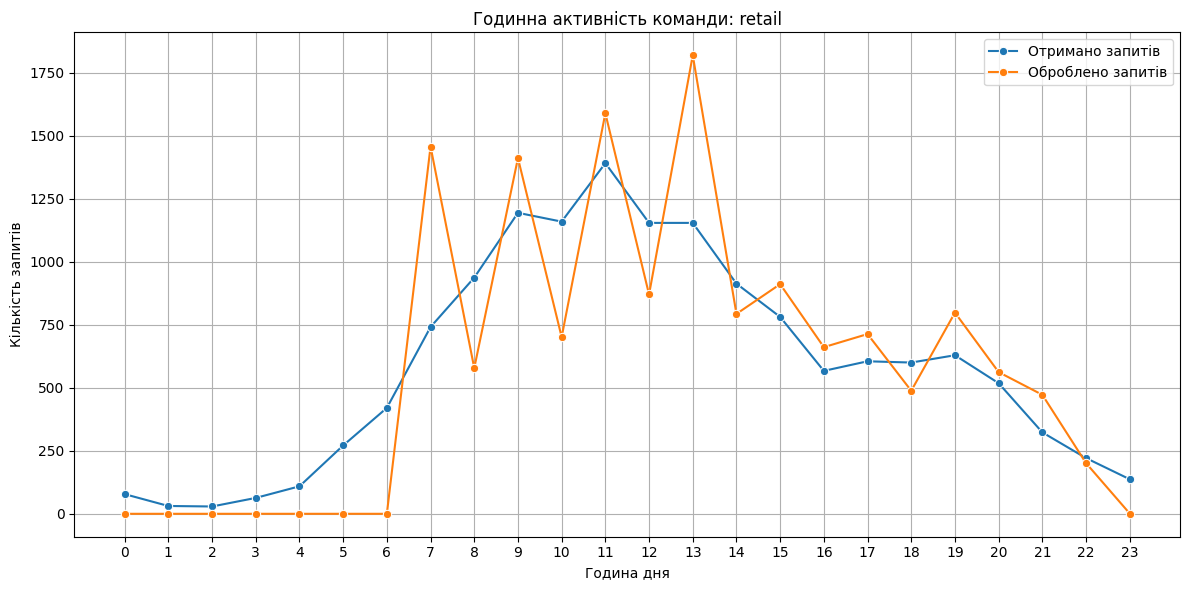

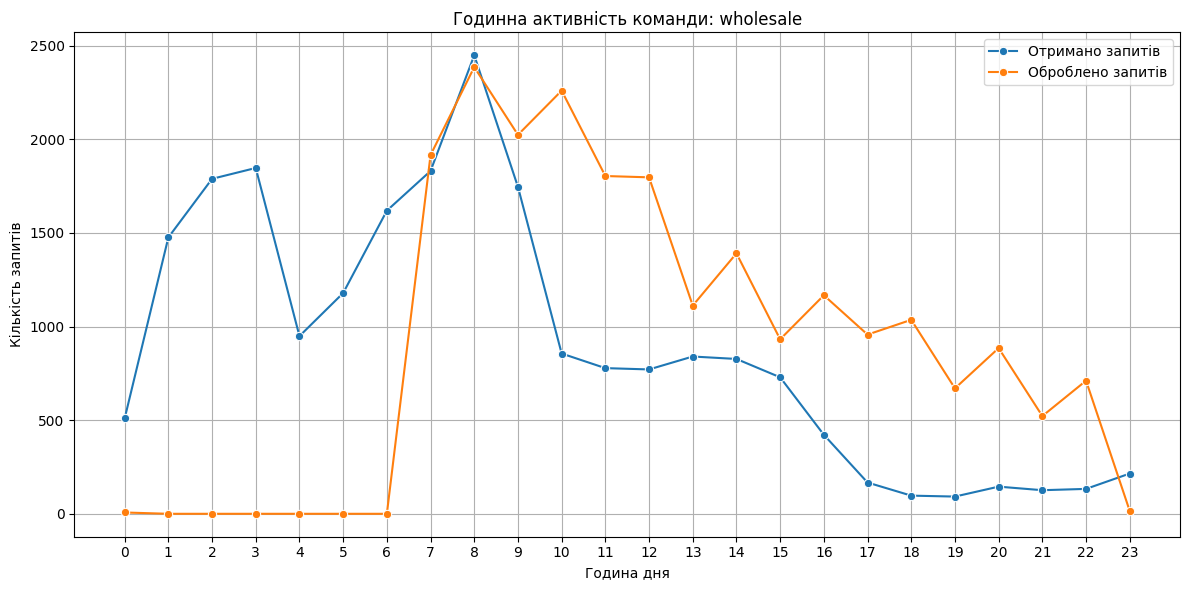

In [24]:
# import seaborn as sns

# # Перетворимо час у datetime
# df["request_time"] = pd.to_datetime(df["request_time"])
# df["finish_time"] = pd.to_datetime(df["finish_time"])

# Витягуємо години
df["request_hour"] = df["request_time"].dt.hour
df["finish_hour"] = df["finish_time"].dt.hour

# Рахуємо кількість запитів по годинах, окремо для кожної команди
request_counts = df.groupby(["team", "request_hour"]).size().reset_index(name="requests")
finish_counts = df.groupby(["team", "finish_hour"]).size().reset_index(name="processed")

# Переіменуємо стовпці для зручності об’єднання
request_counts.rename(columns={"request_hour": "hour"}, inplace=True)
finish_counts.rename(columns={"finish_hour": "hour"}, inplace=True)

# Об'єднуємо дані
hourly_data = pd.merge(request_counts, finish_counts, on=["team", "hour"], how="outer").fillna(0)

# Малюємо графіки
teams = hourly_data["team"].unique()

for team in teams:
    subset = hourly_data[hourly_data["team"] == team]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=subset, x="hour", y="requests", label="Отримано запитів", marker='o')
    sns.lineplot(data=subset, x="hour", y="processed", label="Оброблено запитів", marker='o')
    plt.title(f"Годинна активність команди: {team}")
    plt.xlabel("Година дня")
    plt.ylabel("Кількість запитів")
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

З 23.00 до 7.00 модератори не обробляють запити.
Для команди retail вартто починати робочий день на одну-дві години раніше.
Запити для wholesale активізуються після півночі, тому варто переглянути весь графік роботи для оптимізації часу очікування клієнтами.

# На яких агентів варто звернути увагу задля підвищення якості обслуговування?

In [77]:
# Відсоток запитів, де час обробки перевищує 5 хвилин
# Позначимо, чи перевищує час обробки 5 хвилин
df['over_5_min'] = df['processing_time'] > 5

# Порахувати загальний відсоток таких запитів
over_5_pct = df['over_5_min'].mean() * 100
print(f"Відсоток запитів з обробкою понад 5 хвилин: {over_5_pct:.2f}%")

# Кількість таких запитів по модераторах
over_5_by_moderator = df[df['over_5_min']].groupby('moderator').size().sort_values(ascending=False)

# Додатково — % довгих запитів по кожному модератору (від їх загальної кількості)
moderator_stats = df.groupby('moderator')['over_5_min'].agg(['count', 'sum'])
moderator_stats['over_5_pct'] = (moderator_stats['sum'] / moderator_stats['count']) * 100
moderator_stats = moderator_stats.sort_values('over_5_pct', ascending=False)

print(moderator_stats.head(15))


Відсоток запитів з обробкою понад 5 хвилин: 10.67%
           count  sum  over_5_pct
moderator                        
150           16    9   56.250000
133            2    1   50.000000
149          751  239   31.824234
167          536  149   27.798507
175          420  107   25.476190
185           25    6   24.000000
163          130   29   22.307692
114           60   12   20.000000
146          909  175   19.251925
122          767  147   19.165580
153          838  158   18.854415
161          181   34   18.784530
144           61   11   18.032787
187         1193  214   17.937972
181         1625  274   16.861538


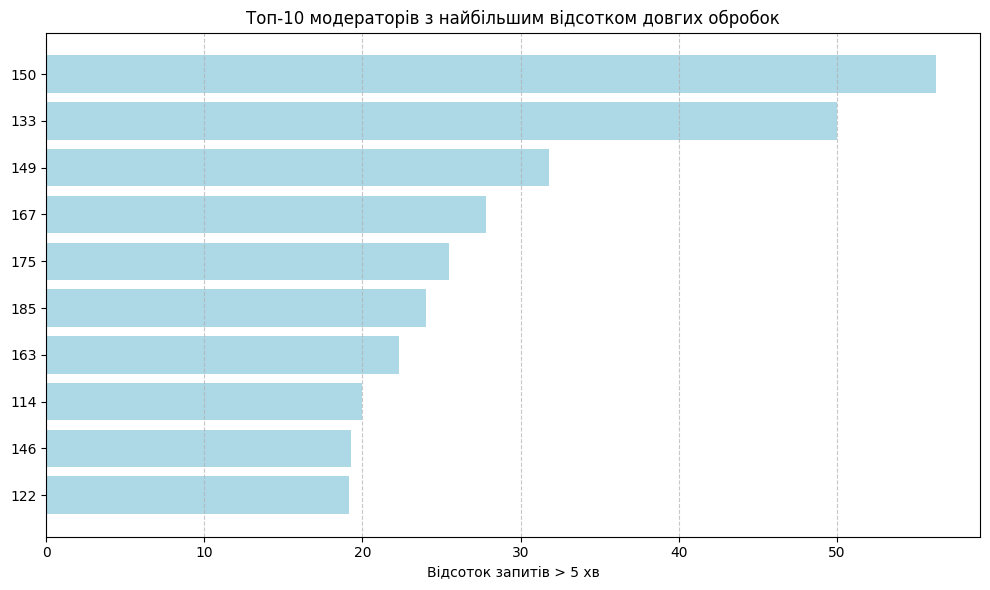

In [81]:
top_moderators = moderator_stats.sort_values('over_5_pct', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_moderators.index.astype(str), top_moderators['over_5_pct'], color='lightblue')
plt.xlabel('Відсоток запитів > 5 хв')
plt.title('Топ-10 модераторів з найбільшим відсотком довгих обробок')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [84]:
df.processing_time.sort_values().tail(5) # Найбільший час обробки запитів

,processing_time
2458,19.883333
35599,19.916667
26345,19.950000
14299,19.983333
8528,20.133333


In [83]:
df.processing_time.mean().round(2) # Середній час обробки запиту, хвилини

np.float64(2.24)

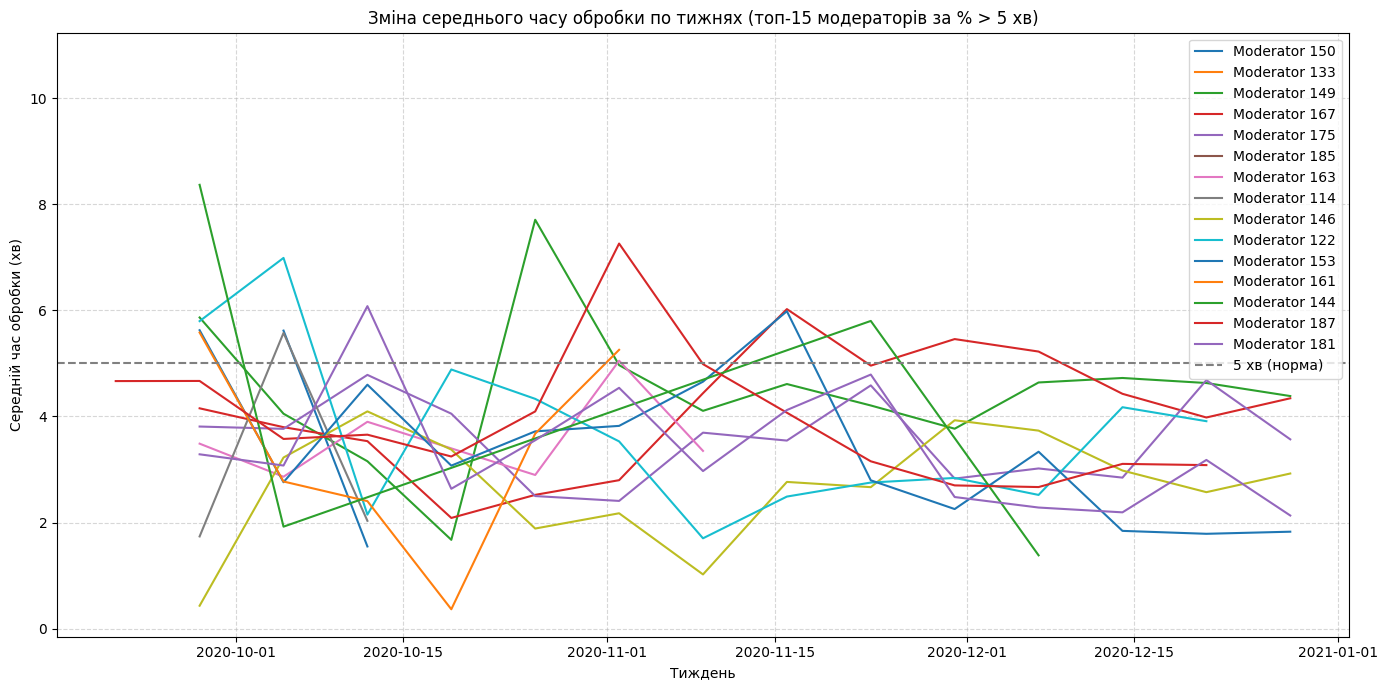

In [87]:
# Розраховуємо % довгих запитів по модераторам
moderator_stats = df.groupby('moderator')['processing_time'].agg(['count', lambda x: (x > 5).sum()])
moderator_stats.columns = ['count', 'over_5_count']
moderator_stats['over_5_pct'] = (moderator_stats['over_5_count'] / moderator_stats['count']) * 100

# Топ-10 модераторів
top_moderators = moderator_stats.sort_values('over_5_pct', ascending=False).head(15).index

# Фільтруємо лише ці 10 модераторів
df_top = df[df['moderator'].isin(top_moderators)]

# Середній час обробки по тижнях і модераторам
weekly_avg = df_top.groupby(['moderator', 'week'])['processing_time'].mean().reset_index()

# Візуалізація
plt.figure(figsize=(14, 7))

for moderator in top_moderators:
    data = weekly_avg[weekly_avg['moderator'] == moderator]
    plt.plot(data['week'], data['processing_time'], label=f'Moderator {moderator}')

plt.axhline(5, color='gray', linestyle='--', label='5 хв (норма)')
plt.xlabel('Тиждень')
plt.ylabel('Середній час обробки (хв)')
plt.title('Зміна середнього часу обробки по тижнях (топ-15 модераторів за % > 5 хв)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Тобто для більшості час обробки запиту зменшився до прийнятних менше 5 хвилин.

<ipython-input-69-0727c4f6d66e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['week'] = pd.to_datetime(df_retail['week']).dt.date


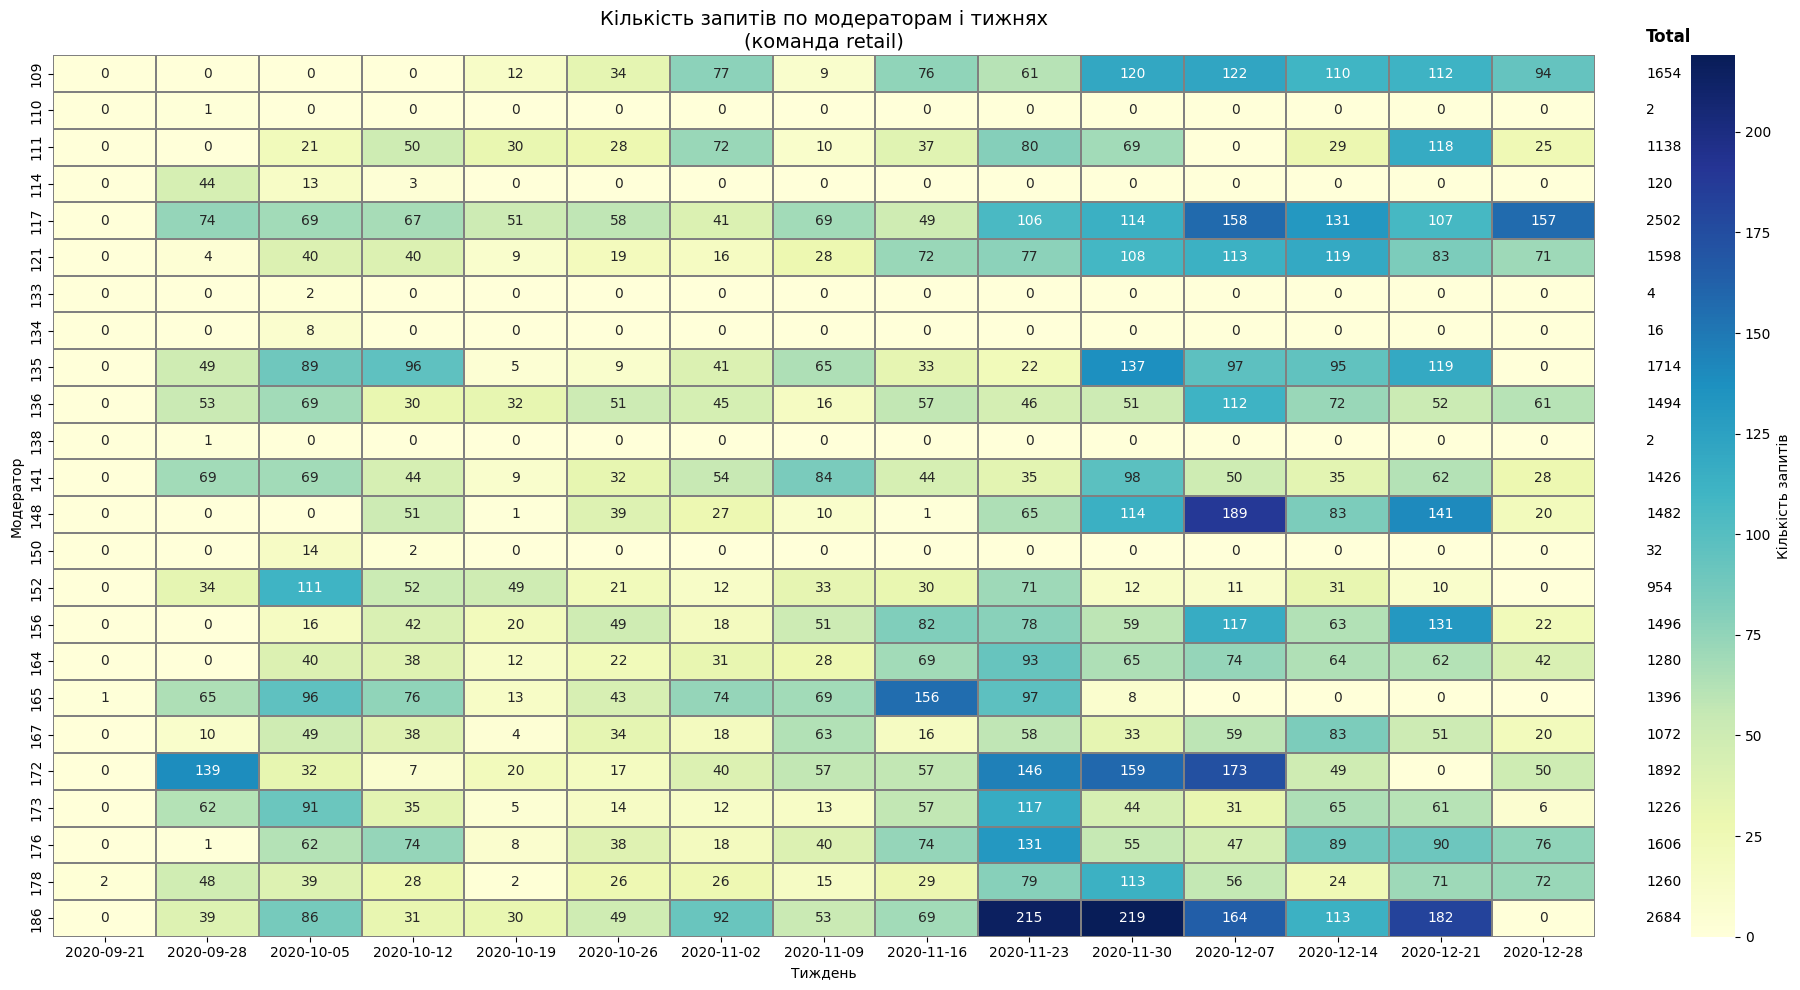

In [69]:
df_retail = df[df.team == 'retail']
df_retail['week'] = pd.to_datetime(df_retail['week']).dt.date
# Окрема колонка Total
requests_by_mod_week_retail = df_retail.pivot_table(
    index='moderator',
    columns='week',
    values='id_request',
    aggfunc='count',
    fill_value=0
)
requests_by_mod_week_retail["Total"] = requests_by_mod_week_retail.sum(axis=1)
totals = requests_by_mod_week_retail.sum(axis=1)

# Виділяємо частину без Total
heatmap_data = requests_by_mod_week_retail.drop(columns='Total')

# Малюємо теплову карту
plt.figure(figsize=(20, 10))
ax = sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    linewidths=0.3,
    linecolor='gray',
    annot=True,
    fmt='d',
    cbar_kws={"label": "Кількість запитів"}
)

# Додаємо колонку Total як текст справа від карти
for y, total in enumerate(totals):
    ax.text(
        len(heatmap_data.columns) + 0.5,  # x-позиція трохи правіше останньої колонки
        y + 0.5,                          # y-позиція (по центру клітинки)
        f"{int(total)}",                 # саме значення
        va='center', ha='left', fontsize=10, color='black'
    )

# Додаємо підпис для цієї колонки
ax.text(
    len(heatmap_data.columns) + 0.5,
    -0.5,
    "Total",
    va='center', ha='left', fontsize=12, fontweight='bold', color='black'
)

plt.title('Кількість запитів по модераторам і тижнях\n(команда retail)', fontsize=14)
plt.xlabel('Тиждень')
plt.ylabel('Модератор')
plt.tight_layout()
plt.show()

<ipython-input-70-0bbd3c939c62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wholesale['week'] = pd.to_datetime(df_wholesale['week']).dt.date


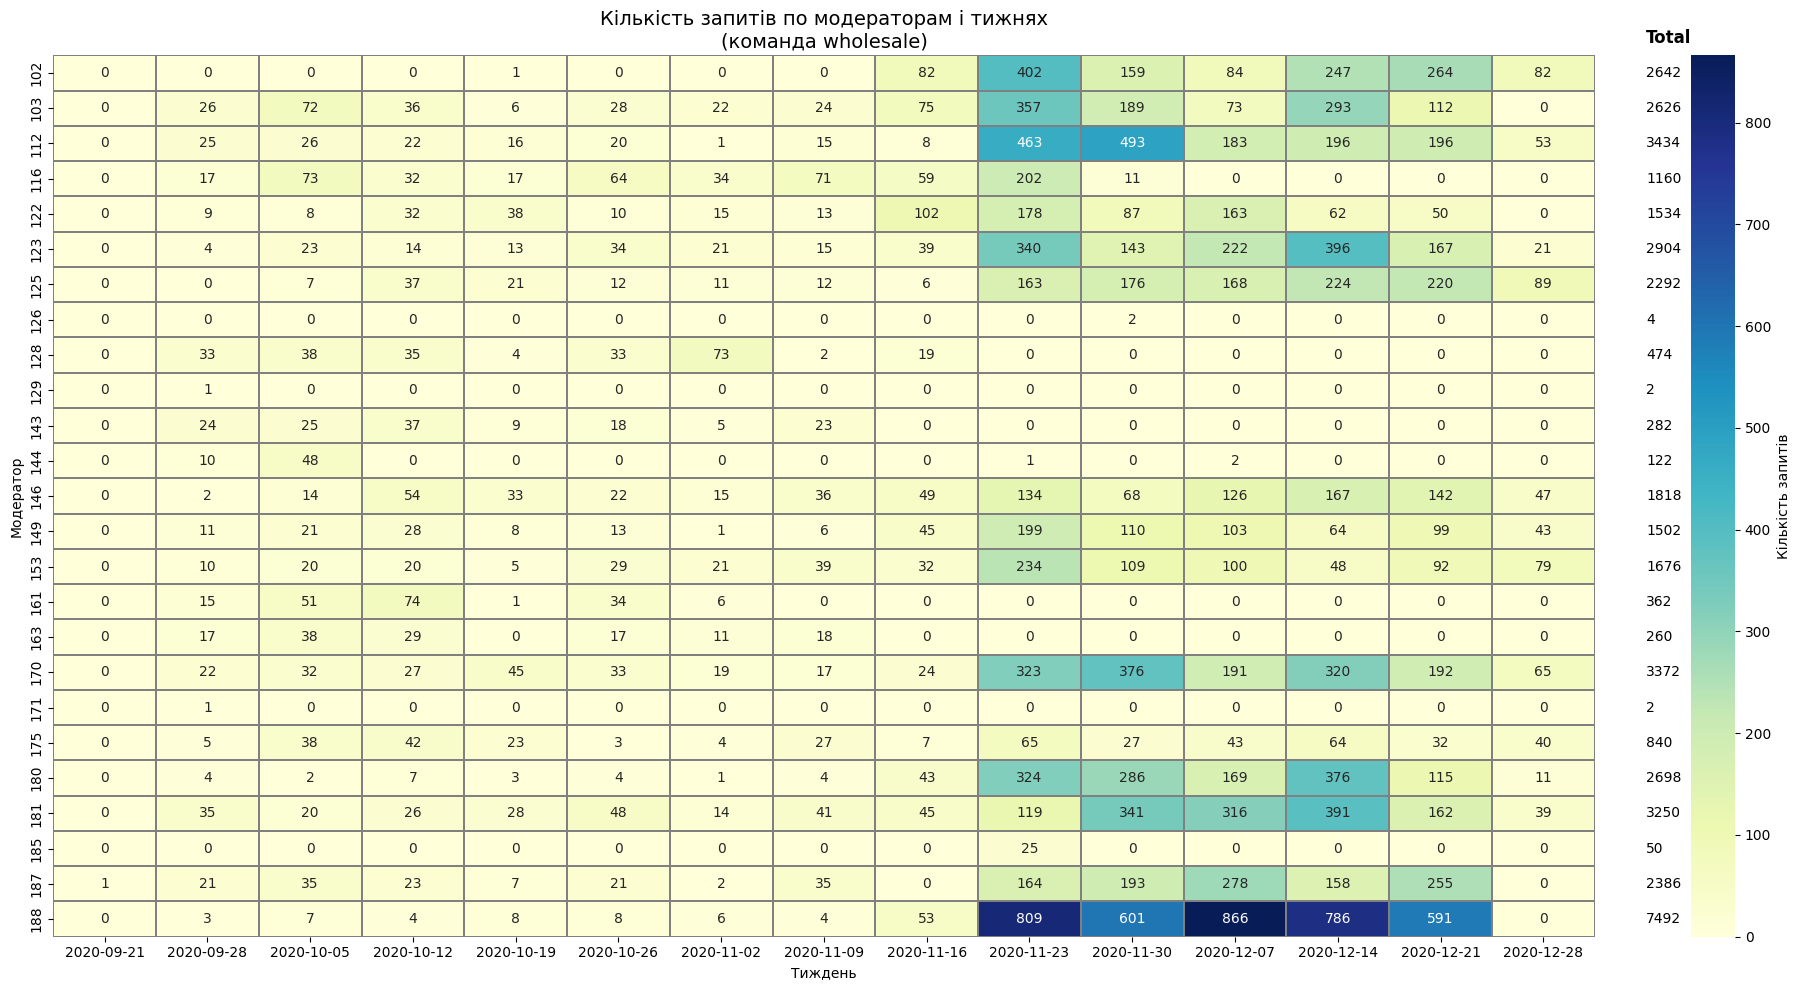

In [70]:
df_wholesale = df[df.team == 'wholesale']
df_wholesale['week'] = pd.to_datetime(df_wholesale['week']).dt.date
# Окрема колонка Total
requests_by_mod_week_wholesale = df_wholesale.pivot_table(
    index='moderator',
    columns='week',
    values='id_request',
    aggfunc='count',
    fill_value=0
)
requests_by_mod_week_wholesale["Total"] = requests_by_mod_week_wholesale.sum(axis=1)
totals = requests_by_mod_week_wholesale.sum(axis=1)

# Виділяємо частину без Total
heatmap_data = requests_by_mod_week_wholesale.drop(columns='Total')

# Малюємо теплову карту
plt.figure(figsize=(20, 10))
ax = sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    linewidths=0.3,
    linecolor='gray',
    annot=True,
    fmt='d',
    cbar_kws={"label": "Кількість запитів"}
)

# Додаємо колонку Total як текст справа від карти
for y, total in enumerate(totals):
    ax.text(
        len(heatmap_data.columns) + 0.5,  # x-позиція трохи правіше останньої колонки
        y + 0.5,                          # y-позиція (по центру клітинки)
        f"{int(total)}",                 # саме значення
        va='center', ha='left', fontsize=10, color='black'
    )

# Додаємо підпис для цієї колонки
ax.text(
    len(heatmap_data.columns) + 0.5,
    -0.5,
    "Total",
    va='center', ha='left', fontsize=12, fontweight='bold', color='black'
)

plt.title('Кількість запитів по модераторам і тижнях\n(команда wholesale)', fontsize=14)
plt.xlabel('Тиждень')
plt.ylabel('Модератор')
plt.tight_layout()
plt.show()

Можна припустити, що з другої половини листопада починається сезон передсвяткових розпродажів і кількість запитів гуртового продажу значно збільшується порівняно з попереднім періодом.

Порахуємо скільки годин на день працюють модератори, як різницю між першим і останнім завданнями одного дня.

In [152]:
# Обчислюємо щоденний робочий інтервал для кожного модератора
# Додамо колонку з датою (для групування)
df['date'] = df['start_time'].dt.date

# Обчислимо початок і кінець роботи кожного модератора щодня
daily_bounds = df.groupby(['moderator', 'date']).agg(
    first_task=('start_time', 'min'),
    last_task=('finish_time', 'max')
).reset_index()

# Обчислюємо тривалість робочого дня (у годинах)
daily_bounds['work_duration'] = (daily_bounds['last_task'] - daily_bounds['first_task']).dt.total_seconds() / 3600

In [153]:
daily_bounds.groupby('moderator')['work_duration'].mean()

,work_duration
moderator,
102,4.285480
103,3.203299
109,5.250655
110,0.021667
111,2.929167
112,3.938418
114,4.015185
116,2.928205
117,5.377932


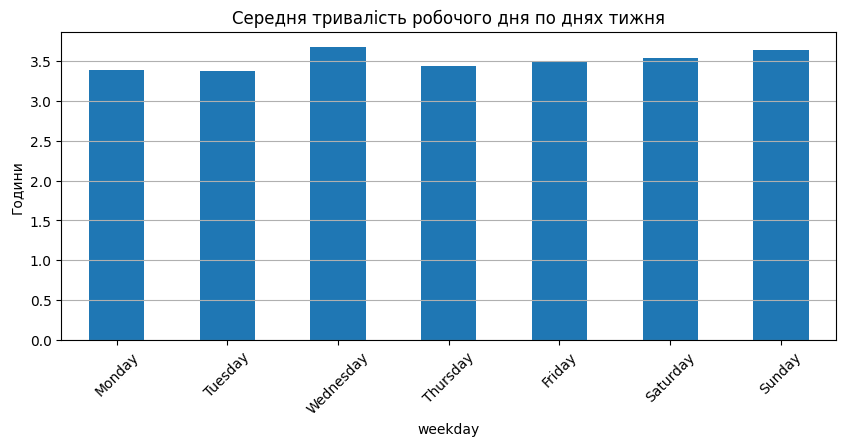

In [154]:
# Середня тривалість робочого дня по днях тижня
daily_bounds['weekday'] = pd.to_datetime(daily_bounds['date']).dt.day_name()
avg_work_by_weekday = daily_bounds.groupby('weekday')['work_duration'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

avg_work_by_weekday.plot(kind='bar', figsize=(10, 4), title='Середня тривалість робочого дня по днях тижня')
plt.ylabel('Години')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

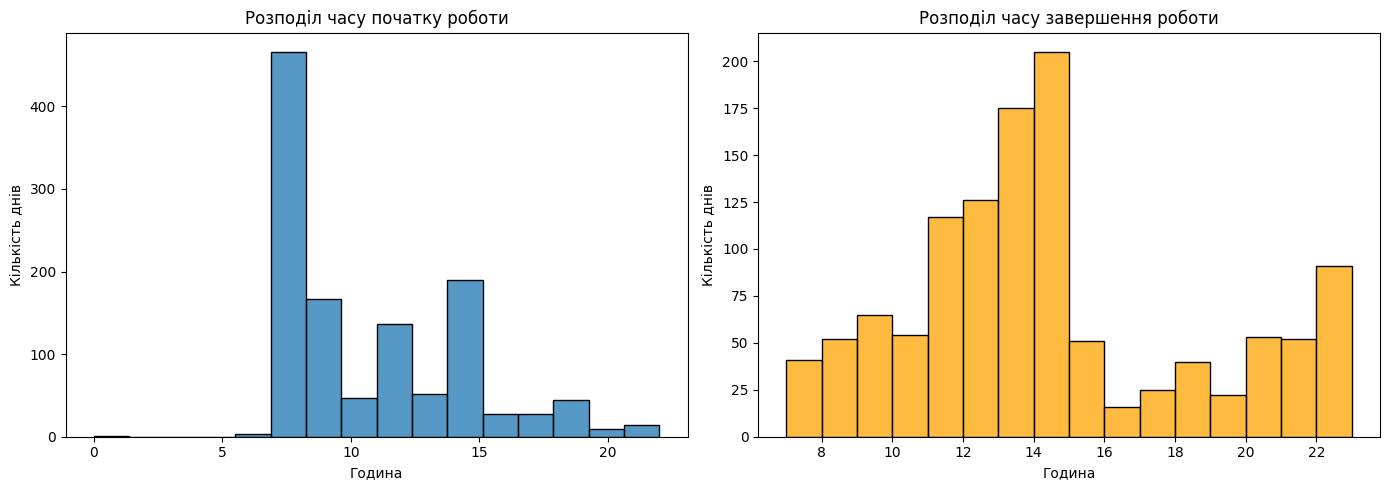

In [155]:
# Розподіл початку / кінця робочого дня
daily_bounds['start_hour'] = daily_bounds['first_task'].dt.hour
daily_bounds['end_hour'] = daily_bounds['last_task'].dt.hour

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(daily_bounds['start_hour'], bins=16, kde=False)
plt.title("Розподіл часу початку роботи")
plt.xlabel("Година")
plt.ylabel("Кількість днів")

plt.subplot(1, 2, 2)
sns.histplot(daily_bounds['end_hour'], bins=16, kde=False, color='orange')
plt.title("Розподіл часу завершення роботи")
plt.xlabel("Година")
plt.ylabel("Кількість днів")

plt.tight_layout()
plt.show()

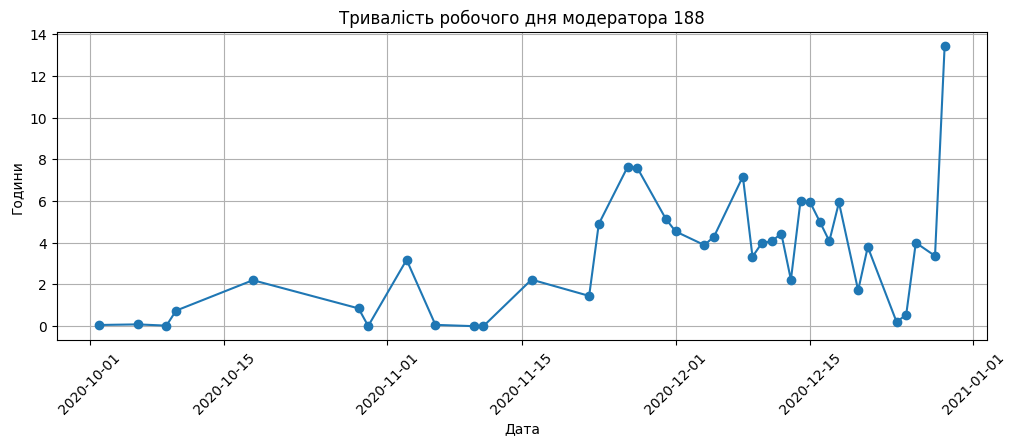

In [156]:
# Індивідуальний графік активності самого продуктивного модератора
# moderator_sample = daily_bounds['moderator'].sample(1).iloc[0]
moderator_sample  = 188
sample_df = daily_bounds[daily_bounds['moderator'] == moderator_sample]
sample_df = sample_df.sort_values('date')

plt.figure(figsize=(12, 4))
plt.plot(sample_df['date'], sample_df['work_duration'], marker='o')
plt.title(f'Тривалість робочого дня модератора {moderator_sample}')
plt.xlabel('Дата')
plt.ylabel('Години')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

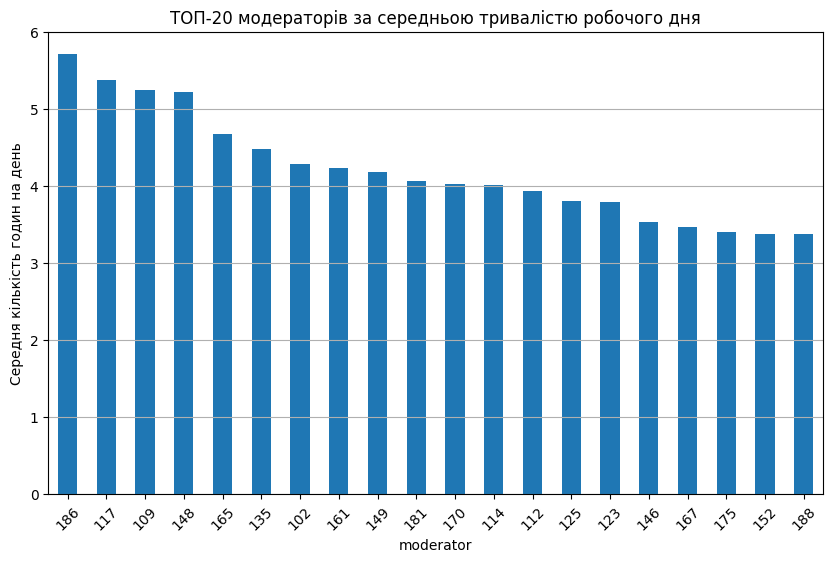

In [157]:
#  Порівняння навантаження між модераторами
avg_hours_per_mod = daily_bounds.groupby('moderator')['work_duration'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_hours_per_mod.head(20).plot(kind='bar')
plt.title('ТОП-20 модераторів за середньою тривалістю робочого дня')
plt.ylabel('Середня кількість годин на день')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [158]:
# Перевірка на перевищення “нормальних” годин (наприклад 10+)
overload_days = daily_bounds[daily_bounds['work_duration'] > 10]
print(f"Днів з понад 10 годин роботи: {len(overload_days)}")

Днів з понад 10 годин роботи: 2


In [176]:
# Високий середній час очікування відповіді
avg_wait = df.groupby('moderator')['wait_time'].mean().round(2).sort_values(ascending=False)
problematic_wait = avg_wait[avg_wait > 15]  # понад 15 хв — це вже поза очікуваннями менеджменту

In [177]:
len(problematic_wait)

44

In [178]:
problematic_wait.head(10)

,wait_time
moderator,
126,5996.45
181,4692.15
180,4579.58
112,4382.39
187,4372.23
188,4058.97
170,3883.56
123,3762.91
102,3714.67


In [182]:
# Високий відсоток запитів з очікуванням > 45 хв
long_waits = df[df['wait_time'] > 45]
long_wait_ratio = long_waits.groupby('moderator').size() / df.groupby('moderator').size()
long_wait_ratio = long_wait_ratio.dropna().sort_values(ascending=False)

In [183]:
len(long_wait_ratio)

44

In [184]:
long_wait_ratio.head(10)

,0
moderator,
133,1.000000
185,1.000000
126,1.000000
102,0.993187
188,0.990657
180,0.982950
112,0.974374
149,0.972037
122,0.966102


In [165]:
#  Мала кількість опрацьованих запитів (при нормальному обсязі роботи)
requests_count = df.groupby('moderator').size()
avg_work_hours = daily_bounds.groupby('moderator')['work_duration'].mean()
requests_per_hour = requests_count / avg_work_hours
threshold = 30
low_productivity = requests_per_hour[requests_per_hour < threshold]  # можна обрати поріг, наприклад, 3 запити/год


In [166]:
low_productivity

,0
moderator,
114,14.943271
129,20.809249
133,3.479942
185,19.342360


In [185]:
# Нестабільна активність (часті пропуски днів або короткі дні)
days_active = daily_bounds.groupby('moderator')['date'].nunique()
avg_hours = daily_bounds.groupby('moderator')['work_duration'].mean().round(2)

In [188]:
avg_hours.sort_values(ascending=True).head(10)

,work_duration
moderator,
138,0.00
171,0.00
126,0.02
110,0.02
129,0.05
134,0.16
150,0.37
133,0.57
144,0.87


# Чи варто збільшити команду підтримки і наскільки?

1. Аналіз середнього навантаження на модераторів
Кількість оброблених запитів на одного модератора: Можна порахувати кількість запитів, які обробляє кожен модератор за день/тиждень. Це дозволить зрозуміти, скільки роботи припадає на кожного.

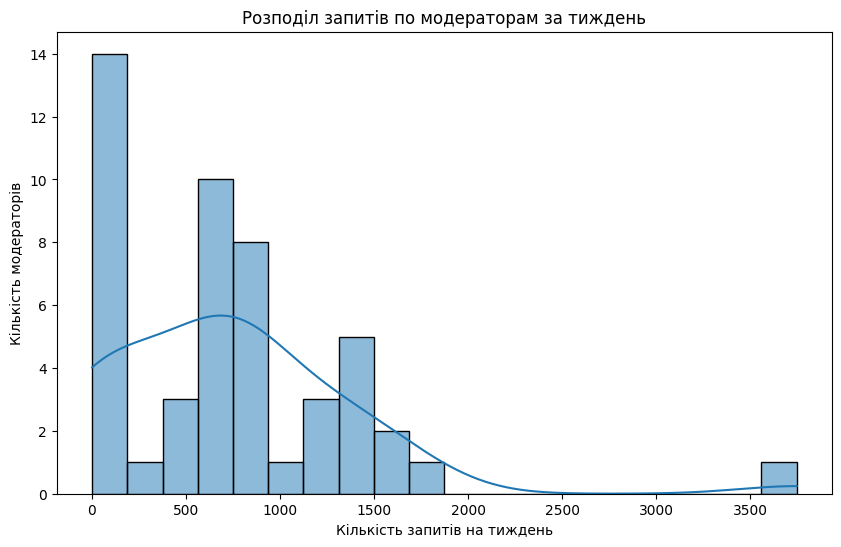

In [189]:
# Підрахуємо кількість запитів на кожного модератора по днях
moderator_load = df.groupby(['moderator', 'date']).size().reset_index(name='requests_per_day')

# Підрахуємо середнє навантаження за тиждень
weekly_moderator_load = moderator_load.groupby('moderator')['requests_per_day'].sum().reset_index(name='requests_per_week')

# Візуалізація
plt.figure(figsize=(10, 6))
sns.histplot(weekly_moderator_load['requests_per_week'], kde=True, bins=20)
plt.title('Розподіл запитів по модераторам за тиждень')
plt.xlabel('Кількість запитів на тиждень')
plt.ylabel('Кількість модераторів')
plt.show()

2. Аналіз часу обробки запитів
Якщо середній час обробки запиту наближається до цільових 5 хвилин, а кількість запитів збільшується, можна побачити, чи потребують модератори більше часу для обробки запитів (наприклад, у пікові періоди).

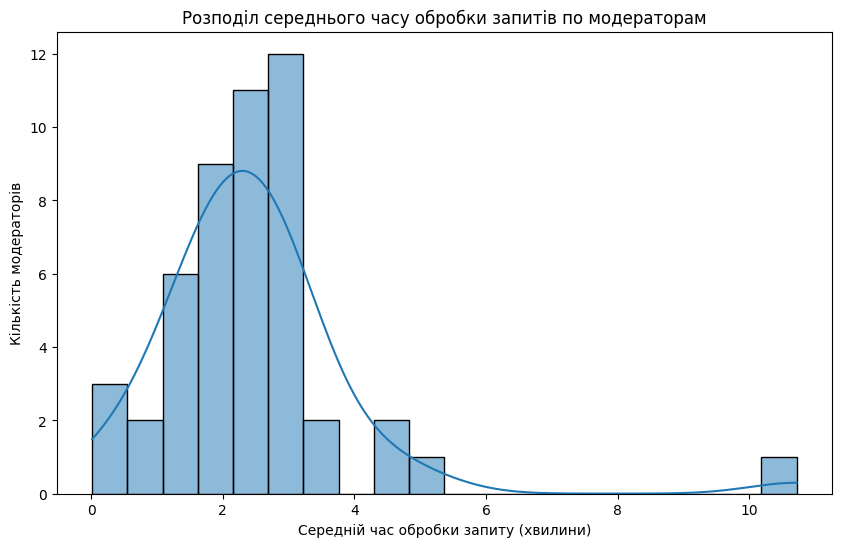

In [190]:
# Підрахуємо середній час обробки запиту для кожного модератора
avg_processing_time = df.groupby('moderator')['processing_time'].mean().reset_index(name='avg_processing_time')

# Візуалізація
plt.figure(figsize=(10, 6))
sns.histplot(avg_processing_time['avg_processing_time'], kde=True, bins=20)
plt.title('Розподіл середнього часу обробки запитів по модераторам')
plt.xlabel('Середній час обробки запиту (хвилини)')
plt.ylabel('Кількість модераторів')
plt.show()

3. Визначення пік навантаження
Можна візуалізувати кількість запитів по годинах і визначити, чи є певні години, коли навантаження на команду значно зростає.

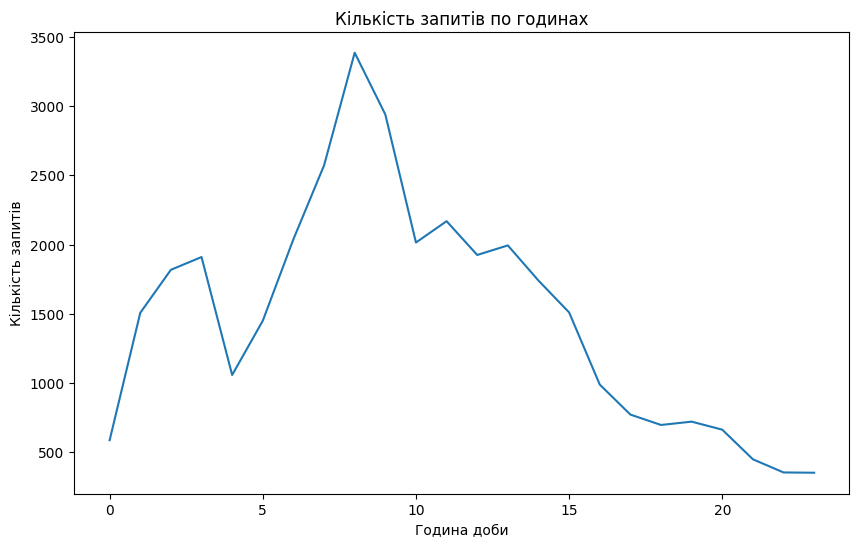

In [191]:
# Групуємо за годинами
df['hour'] = df['request_time'].dt.hour

# Підрахуємо кількість запитів по годинах
requests_by_hour = df.groupby('hour').size().reset_index(name='requests')

# Візуалізація
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='requests', data=requests_by_hour)
plt.title('Кількість запитів по годинах')
plt.xlabel('Година доби')
plt.ylabel('Кількість запитів')
plt.show()

4. Визначення відсотка запитів, що вимагають більше часу
Також можна розрахувати, скільки відсотків запитів обробляються більше 15 або 45 хвилин.

In [192]:
# Відсоток запитів, які обробляються більше 15 хвилин
over_15min = df[df['wait_time'] > 15].shape[0] / df.shape[0] * 100

# Відсоток запитів, які обробляються більше 45 хвилин
over_45min = df[df['wait_time'] > 45].shape[0] / df.shape[0] * 100

print(f"Відсоток запитів, що обробляються більше 15 хвилин: {over_15min:.2f}%")
print(f"Відсоток запитів, що обробляються більше 45 хвилин: {over_45min:.2f}%")

Відсоток запитів, що обробляються більше 15 хвилин: 91.94%
Відсоток запитів, що обробляються більше 45 хвилин: 78.34%
